In [57]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [58]:
for i in range(8):
    if i==0:
        train = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
        train=pd.concat([train,temp])

In [59]:
train=train.reset_index(drop=True)
train

,suma,distancias,entropia_total,entropias,mutual_info,m_earth,max_info_p,sim_faltantes,Compatibilidad,Incompatibilidad,Rel_conceptuales,Shape Origin,Shape Finish,Total T,Match,CLASS
0,0.000000,0.00000,3.583,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,5,0,40,NaN,YES
1,0.000000,135.29070,3.805,0.000,0.000000,0.000000,0.000000,1.000000,0,0,1,6,0,39,| related_to +,NO
2,0.000000,101.96600,5.616,0.000,0.000000,0.000000,0.000000,1.000000,1,0,0,10,0,45,| derived_from +,UNKNOWN
3,0.000000,0.00000,5.407,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,7,0,60,NaN,YES
4,-0.442936,142.35385,5.179,3.880,4.089147,0.002735,0.231184,-0.106360,0,0,0,8,1,22,NaN,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.449538,80.40987,5.186,3.974,4.006609,0.002715,0.576517,0.268804,0,0,0,8,1,25,NaN,UNKNOWN
796,0.000000,0.00000,5.390,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,12,0,35,NaN,YES
797,0.000000,0.00000,5.169,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,8,0,29,NaN,UNKNOWN
798,0.000000,0.00000,5.512,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,8,0,31,NaN,NO


<Axes: title={'center': 'Rel_conceptuales'}, xlabel='CLASS'>

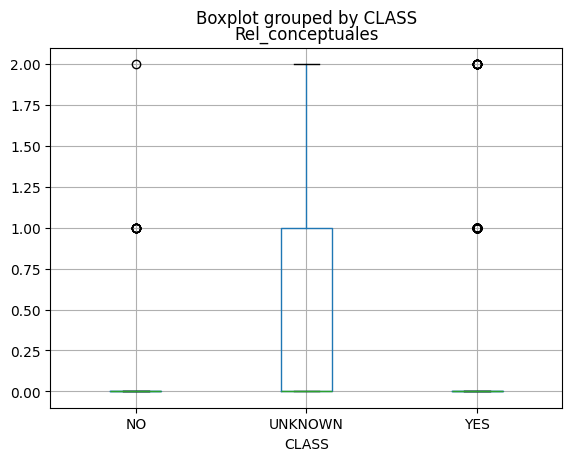

In [60]:
train.boxplot(by="CLASS",column="Rel_conceptuales")

## Eliminar características

In [61]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
train=train.drop(["Match","entropia_total","max_info_p","suma"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,distancias,entropias,mutual_info,m_earth,sim_faltantes,Compatibilidad,Incompatibilidad,Rel_conceptuales,Shape Origin,Shape Finish,Total T,CLASS
0,0.00000,0.000,0.000000,0.000000,1.000000,0,0,0,5,0,40,YES
1,135.29070,0.000,0.000000,0.000000,1.000000,0,0,1,6,0,39,NO
2,101.96600,0.000,0.000000,0.000000,1.000000,1,0,0,10,0,45,UNKNOWN
3,0.00000,0.000,0.000000,0.000000,1.000000,0,0,0,7,0,60,YES
4,142.35385,3.880,4.089147,0.002735,-0.106360,0,0,0,8,1,22,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
795,80.40987,3.974,4.006609,0.002715,0.268804,0,0,0,8,1,25,UNKNOWN
796,0.00000,0.000,0.000000,0.000000,1.000000,0,0,0,12,0,35,YES
797,0.00000,0.000,0.000000,0.000000,1.000000,0,0,0,8,0,29,UNKNOWN
798,0.00000,0.000,0.000000,0.000000,1.000000,0,0,0,8,0,31,NO


In [62]:
train=train.drop(["entropias"],axis=1)

In [63]:
train["Shape Origin"] = train["Shape Origin"] / train["Total T"]
train["Shape Finish"] = train["Shape Finish"] / train["Total T"]

In [64]:
train=train.drop(["Total T"],axis=1)

In [65]:
train

,distancias,mutual_info,m_earth,sim_faltantes,Compatibilidad,Incompatibilidad,Rel_conceptuales,Shape Origin,Shape Finish,CLASS
0,0.00000,0.000000,0.000000,1.000000,0,0,0,0.125000,0.000000,YES
1,135.29070,0.000000,0.000000,1.000000,0,0,1,0.153846,0.000000,NO
2,101.96600,0.000000,0.000000,1.000000,1,0,0,0.222222,0.000000,UNKNOWN
3,0.00000,0.000000,0.000000,1.000000,0,0,0,0.116667,0.000000,YES
4,142.35385,4.089147,0.002735,-0.106360,0,0,0,0.363636,0.045455,YES
...,...,...,...,...,...,...,...,...,...,...
795,80.40987,4.006609,0.002715,0.268804,0,0,0,0.320000,0.040000,UNKNOWN
796,0.00000,0.000000,0.000000,1.000000,0,0,0,0.342857,0.000000,YES
797,0.00000,0.000000,0.000000,1.000000,0,0,0,0.275862,0.000000,UNKNOWN
798,0.00000,0.000000,0.000000,1.000000,0,0,0,0.258065,0.000000,NO


In [66]:
X = train.drop(['CLASS'],axis=1)
y_ = train['CLASS']

In [67]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['CLASS'],axis=1).corr(method='pearson')

In [68]:
train_m

,distancias,mutual_info,m_earth,sim_faltantes,Compatibilidad,Incompatibilidad,Rel_conceptuales,Shape Origin,Shape Finish
distancias,1.000000,0.450296,0.234322,-0.240810,0.243213,0.270867,0.360808,0.316295,0.737374
mutual_info,0.450296,1.000000,0.450576,-0.814836,-0.010143,0.021992,0.051454,0.087851,0.483790
m_earth,0.234322,0.450576,1.000000,-0.511160,-0.011506,0.007905,0.001523,0.085001,0.302845
sim_faltantes,-0.240810,-0.814836,-0.511160,1.000000,0.035266,0.017444,0.057503,0.006648,-0.262157
Compatibilidad,0.243213,-0.010143,-0.011506,0.035266,1.000000,0.022555,0.019378,0.146032,0.101117
Incompatibilidad,0.270867,0.021992,0.007905,0.017444,0.022555,1.000000,-0.025498,0.085308,0.142040
Rel_conceptuales,0.360808,0.051454,0.001523,0.057503,0.019378,-0.025498,1.000000,0.119098,0.155429
Shape Origin,0.316295,0.087851,0.085001,0.006648,0.146032,0.085308,0.119098,1.000000,0.602976
Shape Finish,0.737374,0.483790,0.302845,-0.262157,0.101117,0.142040,0.155429,0.602976,1.000000


<Axes: >

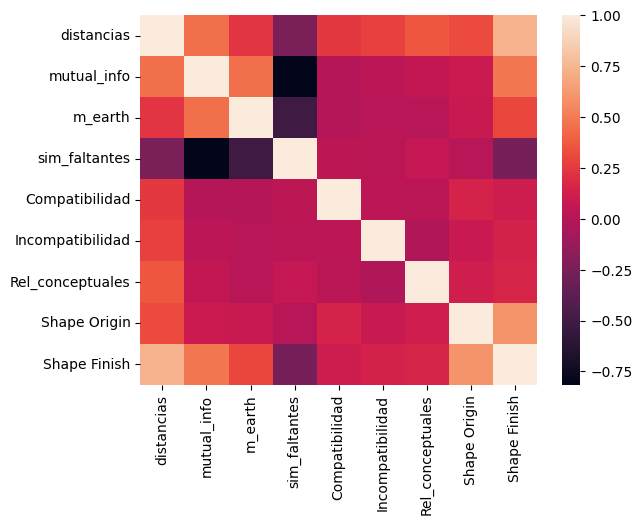

In [69]:
sns.heatmap(train_m)

In [70]:
train_m

,distancias,mutual_info,m_earth,sim_faltantes,Compatibilidad,Incompatibilidad,Rel_conceptuales,Shape Origin,Shape Finish
distancias,1.000000,0.450296,0.234322,-0.240810,0.243213,0.270867,0.360808,0.316295,0.737374
mutual_info,0.450296,1.000000,0.450576,-0.814836,-0.010143,0.021992,0.051454,0.087851,0.483790
m_earth,0.234322,0.450576,1.000000,-0.511160,-0.011506,0.007905,0.001523,0.085001,0.302845
sim_faltantes,-0.240810,-0.814836,-0.511160,1.000000,0.035266,0.017444,0.057503,0.006648,-0.262157
Compatibilidad,0.243213,-0.010143,-0.011506,0.035266,1.000000,0.022555,0.019378,0.146032,0.101117
Incompatibilidad,0.270867,0.021992,0.007905,0.017444,0.022555,1.000000,-0.025498,0.085308,0.142040
Rel_conceptuales,0.360808,0.051454,0.001523,0.057503,0.019378,-0.025498,1.000000,0.119098,0.155429
Shape Origin,0.316295,0.087851,0.085001,0.006648,0.146032,0.085308,0.119098,1.000000,0.602976
Shape Finish,0.737374,0.483790,0.302845,-0.262157,0.101117,0.142040,0.155429,0.602976,1.000000


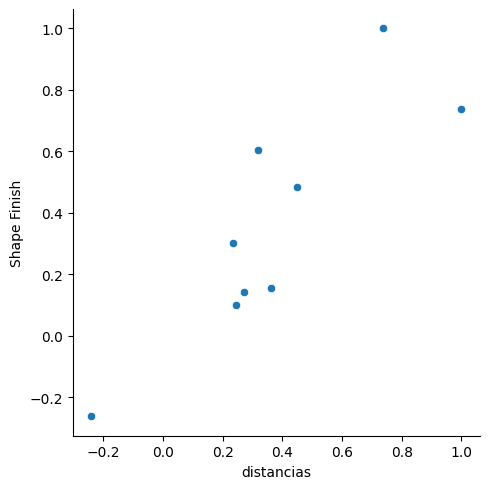

In [71]:
# Checar variables colineales
sns.relplot(data=train_m, x="distancias", y="Shape Finish")

In [72]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [73]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

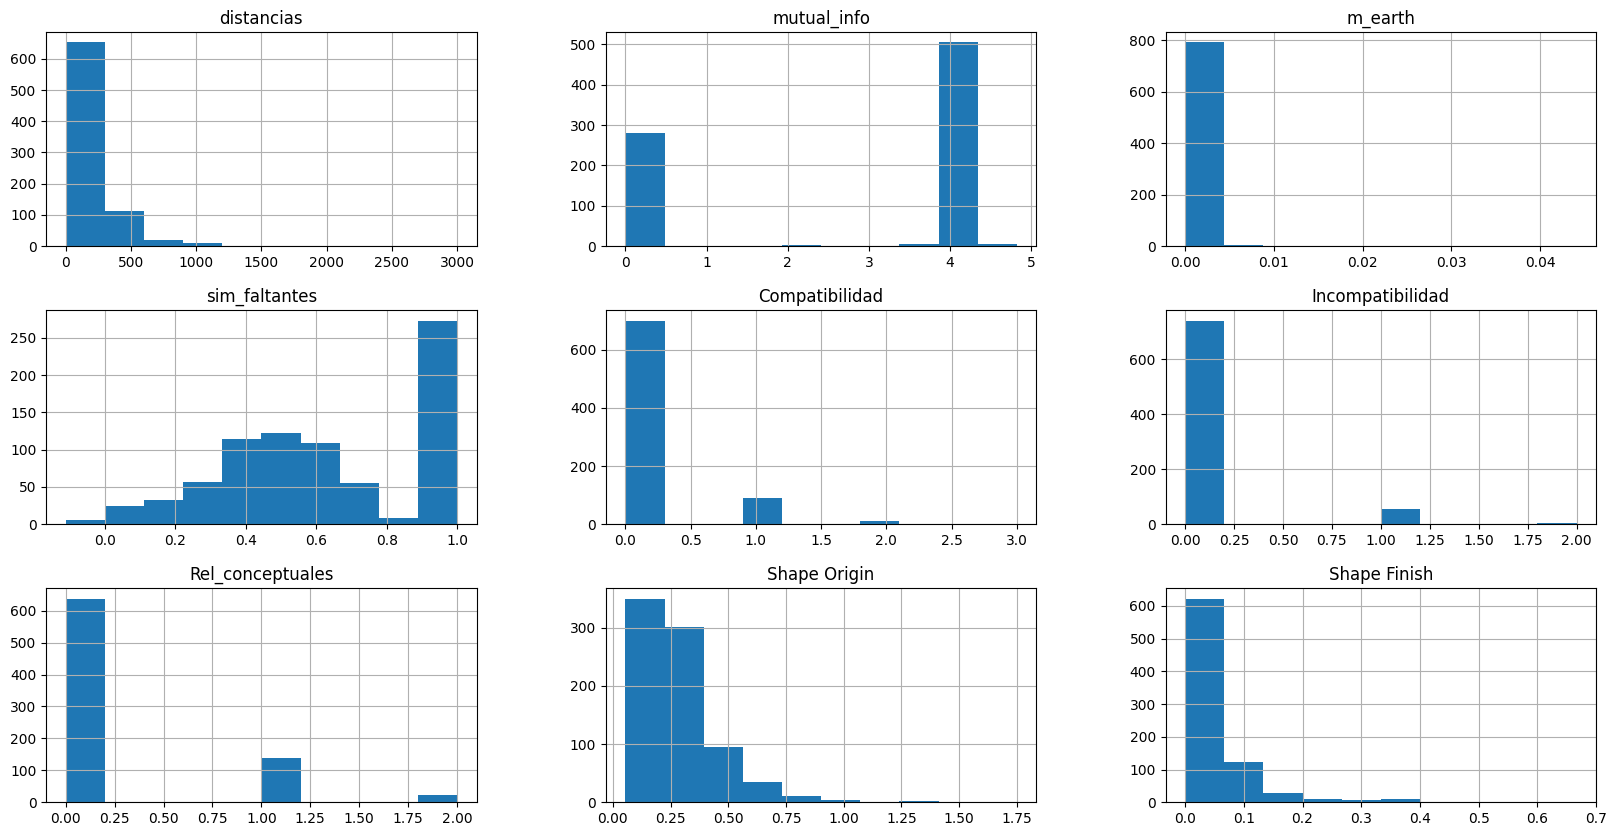

In [74]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [75]:
for i in range(8):
    if i==0:
        test = pd.read_csv('salida/resultados/RTE3/TEST_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/TEST_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [76]:
test = test.reset_index(drop=True)
test

,suma,distancias,entropia_total,entropias,mutual_info,m_earth,max_info_p,sim_faltantes,Compatibilidad,Incompatibilidad,Rel_conceptuales,Shape Origin,Shape Finish,Total T,Match,CLASS
0,0.000000,126.243770,5.101,0.000,0.000000,0.000000,0.000000,1.000000,0,0,1,7,0,36,| related_to +,YES
1,5.074962,137.500780,5.103,4.350,4.042872,0.002521,0.393066,0.369099,0,0,0,9,1,36,NaN,YES
2,0.000000,0.000000,1.240,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,4,0,19,NaN,YES
3,0.000000,0.000000,5.316,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,10,0,35,NaN,YES
4,6.383789,84.603660,5.151,4.265,3.915644,0.004324,0.412710,0.347696,0,0,0,7,1,35,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,5.438,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,6,0,35,NaN,YES
796,0.000000,0.000000,5.730,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,6,0,35,NaN,NO
797,10.231256,104.496376,5.583,4.425,3.976425,0.002651,0.467463,0.483023,0,0,0,8,1,42,NaN,UNKNOWN
798,3.272335,110.865036,5.241,3.567,3.985115,0.003217,0.353093,0.263597,0,0,0,8,1,23,NaN,UNKNOWN


In [77]:
test=test.drop(["Match","entropia_total","max_info_p","suma"],axis=1)
test

,distancias,entropias,mutual_info,m_earth,sim_faltantes,Compatibilidad,Incompatibilidad,Rel_conceptuales,Shape Origin,Shape Finish,Total T,CLASS
0,126.243770,0.000,0.000000,0.000000,1.000000,0,0,1,7,0,36,YES
1,137.500780,4.350,4.042872,0.002521,0.369099,0,0,0,9,1,36,YES
2,0.000000,0.000,0.000000,0.000000,1.000000,0,0,0,4,0,19,YES
3,0.000000,0.000,0.000000,0.000000,1.000000,0,0,0,10,0,35,YES
4,84.603660,4.265,3.915644,0.004324,0.347696,0,0,0,7,1,35,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000,0.000000,0.000000,1.000000,0,0,0,6,0,35,YES
796,0.000000,0.000,0.000000,0.000000,1.000000,0,0,0,6,0,35,NO
797,104.496376,4.425,3.976425,0.002651,0.483023,0,0,0,8,1,42,UNKNOWN
798,110.865036,3.567,3.985115,0.003217,0.263597,0,0,0,8,1,23,UNKNOWN


In [78]:
test =test.drop(["entropias"],axis=1)
test

,distancias,mutual_info,m_earth,sim_faltantes,Compatibilidad,Incompatibilidad,Rel_conceptuales,Shape Origin,Shape Finish,Total T,CLASS
0,126.243770,0.000000,0.000000,1.000000,0,0,1,7,0,36,YES
1,137.500780,4.042872,0.002521,0.369099,0,0,0,9,1,36,YES
2,0.000000,0.000000,0.000000,1.000000,0,0,0,4,0,19,YES
3,0.000000,0.000000,0.000000,1.000000,0,0,0,10,0,35,YES
4,84.603660,3.915644,0.004324,0.347696,0,0,0,7,1,35,NO
...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,0.000000,1.000000,0,0,0,6,0,35,YES
796,0.000000,0.000000,0.000000,1.000000,0,0,0,6,0,35,NO
797,104.496376,3.976425,0.002651,0.483023,0,0,0,8,1,42,UNKNOWN
798,110.865036,3.985115,0.003217,0.263597,0,0,0,8,1,23,UNKNOWN


In [79]:
test["Shape Origin"] = test["Shape Origin"] / test["Total T"]
test["Shape Finish"] = test["Shape Finish"] / test["Total T"]

In [80]:
test

,distancias,mutual_info,m_earth,sim_faltantes,Compatibilidad,Incompatibilidad,Rel_conceptuales,Shape Origin,Shape Finish,Total T,CLASS
0,126.243770,0.000000,0.000000,1.000000,0,0,1,0.194444,0.000000,36,YES
1,137.500780,4.042872,0.002521,0.369099,0,0,0,0.250000,0.027778,36,YES
2,0.000000,0.000000,0.000000,1.000000,0,0,0,0.210526,0.000000,19,YES
3,0.000000,0.000000,0.000000,1.000000,0,0,0,0.285714,0.000000,35,YES
4,84.603660,3.915644,0.004324,0.347696,0,0,0,0.200000,0.028571,35,NO
...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,0.000000,1.000000,0,0,0,0.171429,0.000000,35,YES
796,0.000000,0.000000,0.000000,1.000000,0,0,0,0.171429,0.000000,35,NO
797,104.496376,3.976425,0.002651,0.483023,0,0,0,0.190476,0.023810,42,UNKNOWN
798,110.865036,3.985115,0.003217,0.263597,0,0,0,0.347826,0.043478,23,UNKNOWN


In [81]:
test=test.drop(["Total T"],axis=1)

In [82]:
X_t = test.drop(['CLASS'],axis=1)
y_t = test['CLASS']

In [83]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [84]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [85]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [86]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [87]:
#X_train = np.where(np.isnan(X_train), 0, X_train)
#X_train

In [88]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [89]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [90]:
model.decision_function(X)

array([ 0.97886535,  0.70323393,  0.804066  ,  0.97762952, -0.20999649,
        0.79453496,  1.00394533,  0.79784474,  0.83185742, -0.70917138,
       -0.15810491,  0.99288141, -0.10112916, -0.12401796,  0.73022949,
        0.98998777, -0.44439876, -0.11358955, -0.13276783, -0.20419482,
        0.79280725, -0.10573774,  0.76894287,  0.72329305,  0.73880901,
       -0.04323452,  0.82058276, -0.1646359 , -0.08141785, -0.05996898,
       -0.07660376, -0.1476334 , -0.06750407, -0.06068906,  0.75094552,
       -0.1058313 , -0.14686777, -0.08651857, -0.3169611 ,  0.99740273,
        0.77477406, -0.11652513, -0.07506079, -0.12629058,  0.80437667,
        0.71598154, -0.08313444, -0.09255969,  0.83806338,  0.73746746,
       -0.38209798, -0.11603019, -0.25532993,  0.99935403,  0.8387823 ,
       -0.0881827 , -0.10972641,  0.99877586, -0.17028657, -0.13446348,
        0.98374361, -0.14838512,  0.98813404,  0.68837739,  0.59753191,
       -0.065796  , -0.33239699, -0.08469046, -0.13116198, -0.21

In [91]:
labels=train.columns[:-1]
labels

Index(['distancias', 'mutual_info', 'm_earth', 'sim_faltantes',
       'Compatibilidad', 'Incompatibilidad', 'Rel_conceptuales',
       'Shape Origin', 'Shape Finish'],
      dtype='object')

In [92]:
model.classes_

array([0, 1])

In [93]:
model.coef_[0]

array([-1.94470638, -1.00361017, -0.48028622,  0.09741388, -0.3694259 ,
       -0.36173289, -0.38447816,  0.25952326, -2.1048649 ])

In [94]:
coeficientes=model.coef_[0]

In [95]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  7 Shape Origin 8 Shape Finish


In [96]:
n_columns=train.shape[1]-1

In [97]:
n_columns

9

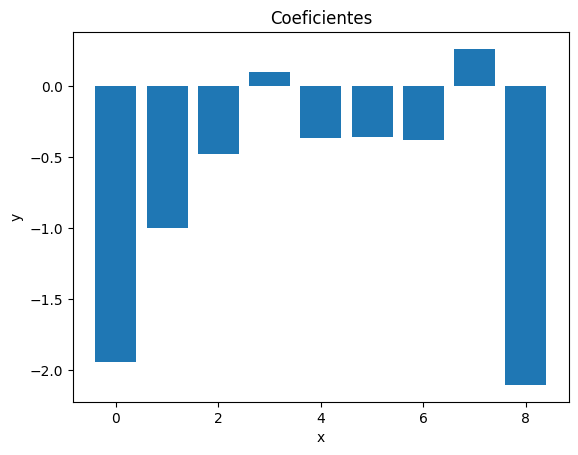

In [98]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [99]:
#X_test = np.where(np.isnan(X_test), 0, X_test)
#X_test

In [100]:
X_test.shape

(800, 9)

In [101]:
predictions = model.predict(X_test)

In [102]:
print(confusion_matrix(y_test, predictions))

[[267 123]
 [207 203]]


In [103]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.59
precision:  0.62
recall 0.5
f1_score:  0.55
matthews_score:  0.18


In [104]:
X_train.shape

(800, 9)

In [105]:
X_test.shape

(800, 9)

In [106]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [107]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [111]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.640000 (0.084084)
Logistic Regression: 0.580000 (0.078014)
Logistic Regression: 0.600000 (0.068326)


In [110]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.240000 (0.094179)


In [112]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [113]:
#linear_model

In [114]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [115]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.56      0.68      0.62       390
           1       0.62      0.50      0.55       410

    accuracy                           0.59       800
   macro avg       0.59      0.59      0.58       800
weighted avg       0.59      0.59      0.58       800



In [116]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [123]:
test.columns[:-1]

Index(['distancias', 'mutual_info', 'm_earth', 'sim_faltantes',
       'Compatibilidad', 'Incompatibilidad', 'Rel_conceptuales',
       'Shape Origin', 'Shape Finish'],
      dtype='object')

In [117]:
explainer.expected_value

-0.028556561814441883

In [122]:
X_test

array([[0.10493407, 0.        , 0.        , ..., 0.33333333, 0.19444444,
        0.        ],
       [0.11429092, 0.83218769, 0.05715207, ..., 0.        , 0.25      ,
        0.07407407],
       [0.        , 0.        , 0.        , ..., 0.        , 0.21052632,
        0.        ],
       ...,
       [0.0868576 , 0.81851008, 0.06011267, ..., 0.        , 0.19047619,
        0.06349206],
       [0.09215124, 0.82029887, 0.07293904, ..., 0.        , 0.34782609,
        0.11594203],
       [0.        , 0.        , 0.        , ..., 0.        , 0.85      ,
        0.        ]])

array([<Axes: title={'center': 'mutual_info'}, xlabel='[CLASS]'>,
       <Axes: title={'center': 'distancias'}, xlabel='[CLASS]'>],
      dtype=object)

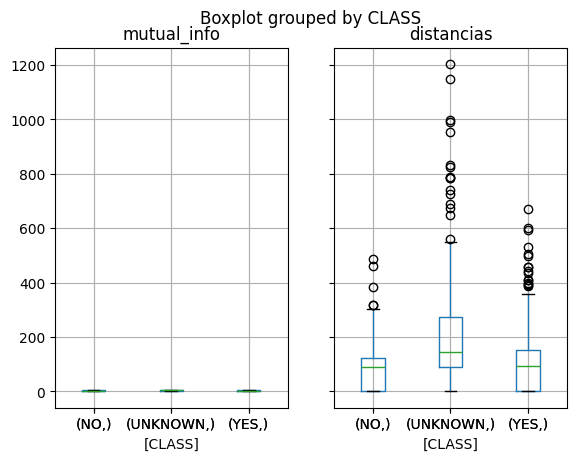

In [121]:
test.boxplot(by=["CLASS"],column=["mutual_info","distancias"])

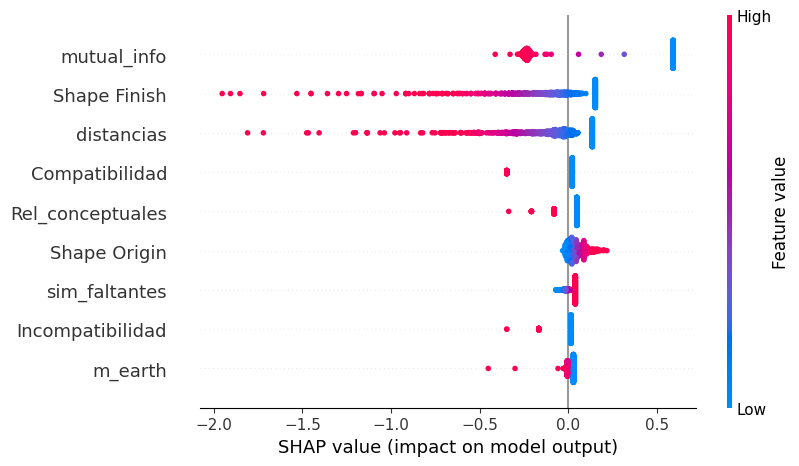

In [118]:
shap.plots.beeswarm(shap_values)

[-3.52197525  0.48479732  0.7022368   0.04897793  0.28283352 -0.34479141
 -0.23339257  0.         -0.61888922 -0.15388447  0.14652681] 0 1


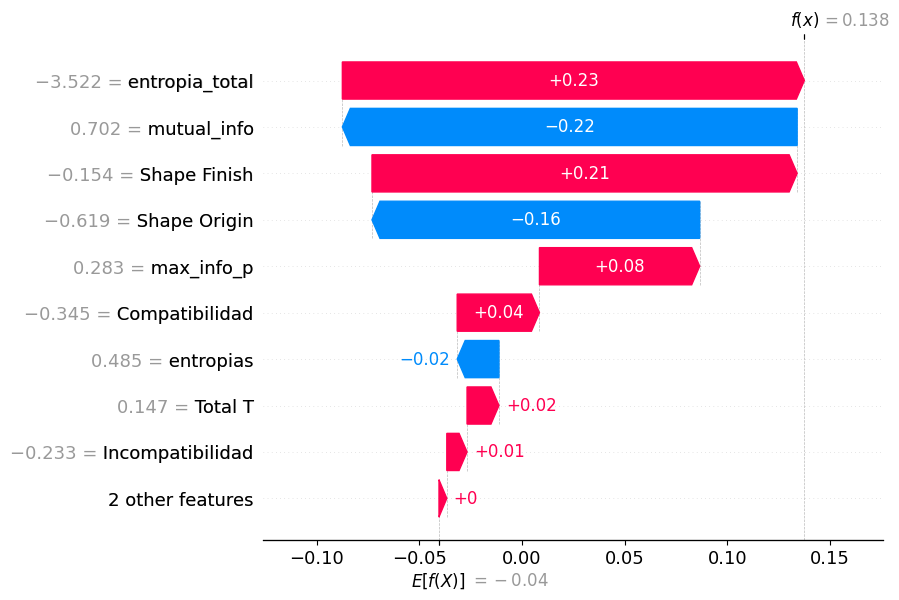

In [47]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

In [103]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[ 0.27831726 -0.53505821 -0.79898427 -0.62125842 -0.46729669 -0.61105676
 -0.15597367 -0.67101221  0.75737301]


IndexError: index 1 is out of bounds for axis 2 with size 1

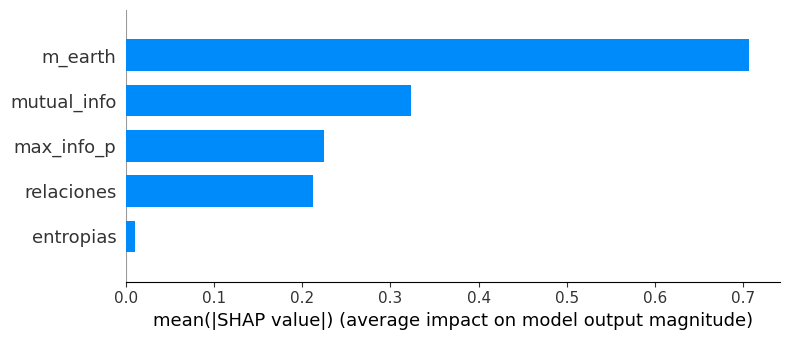

In [ ]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

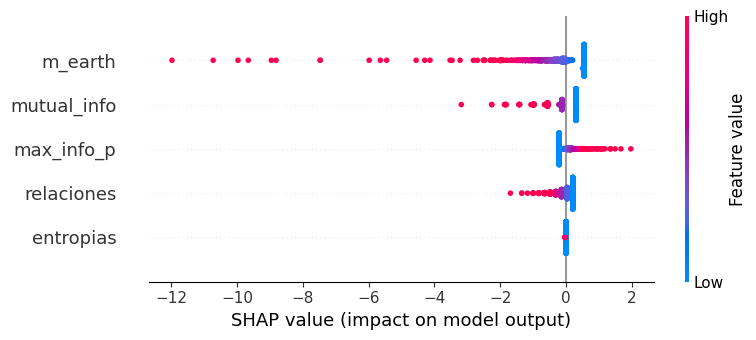

In [ ]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

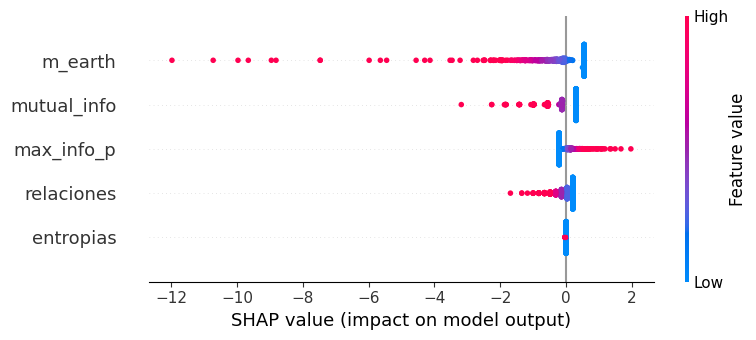

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

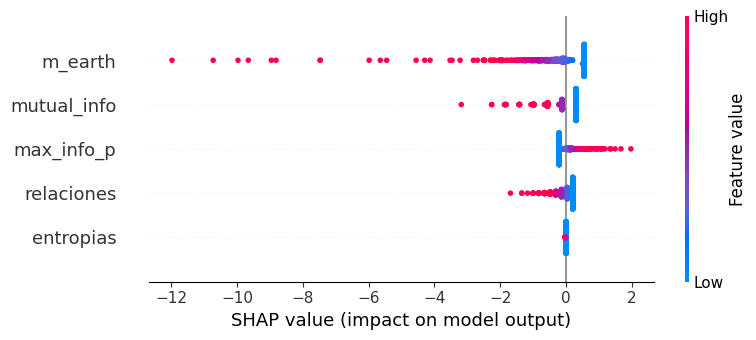

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


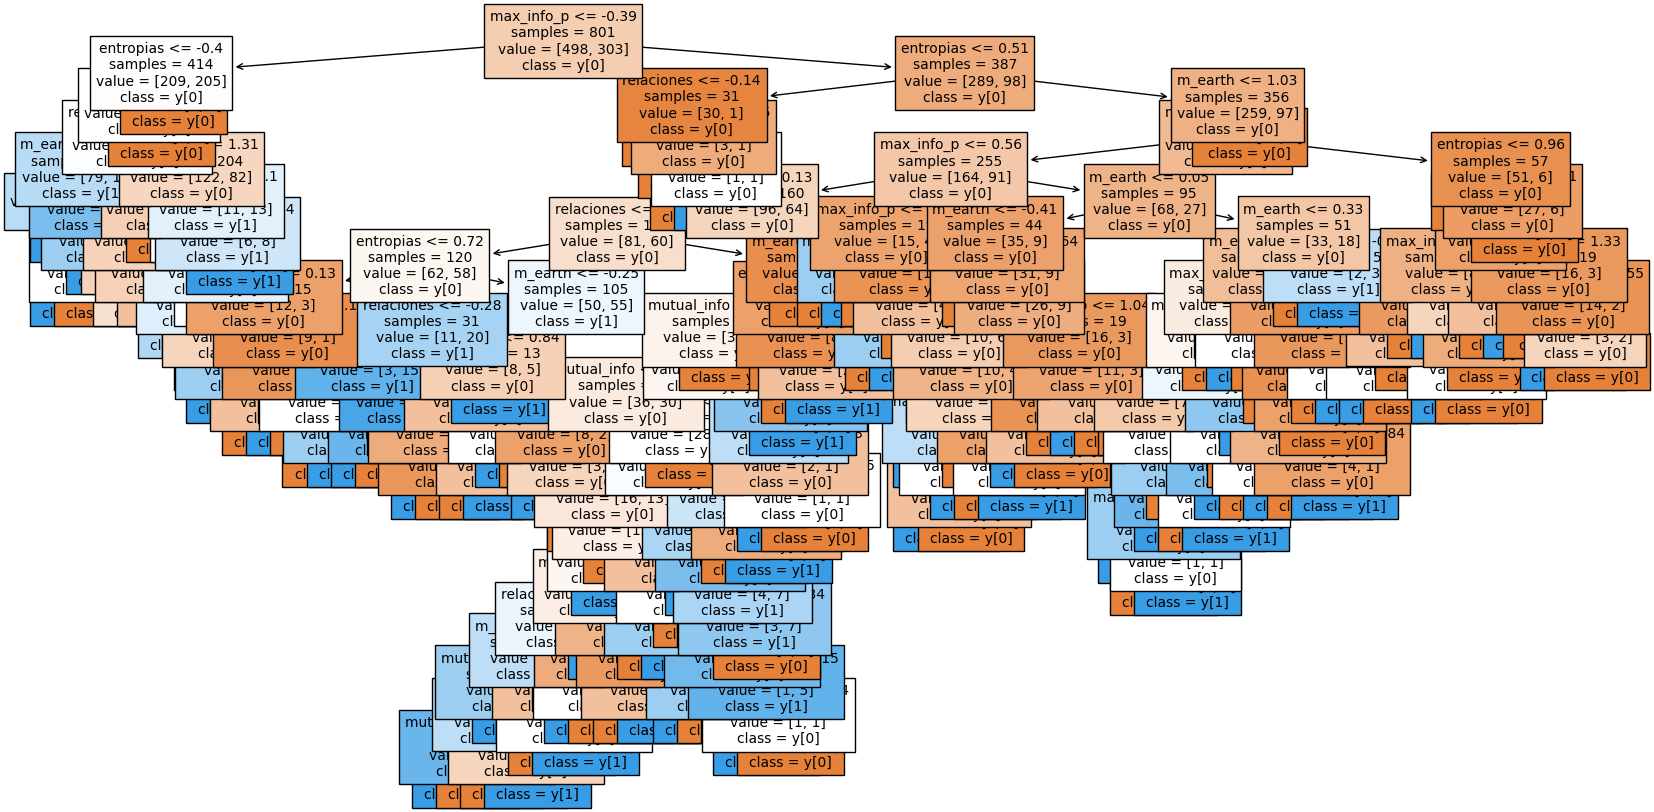

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )